In [1]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [2]:
# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

### Small and noisy dataset

Second order polynomial in a variable:

$$y = 2 + x_1 + 0.5x_{1}^{2}$$

In [11]:
# Sets the number of examples.
N = 30

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

# Create target function.
# Second order polynomial.
y = 2 + x1 + 0.5*x1**2

# Noise.
w = np.random.randn(N, 1)

# Observable function.
y_noisy = y + w

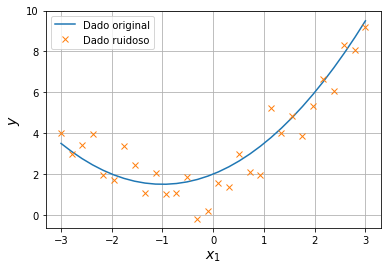

In [12]:
plt.plot(x1, y, label='Dado original')
plt.plot(x1, y_noisy, 'x', label='Dado ruidoso')
plt.legend(loc='best')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid()
# Save figure
#plt.savefig("poly-reg-data.png", dpi=600)
#Show the plot.
plt.show()

### Training polynomial regression models of different orders.

+ The `PolynomialFeatures` class creates the attribute matrix with the polynomial combinations of the attributes.
+ The `Pipeline` class creates an object that sequences the application of transformers and estimators (e.g., PolynomialFeatures and StandardScaler, LinearRegression) to the data and, at the end, trains and performs predictions.

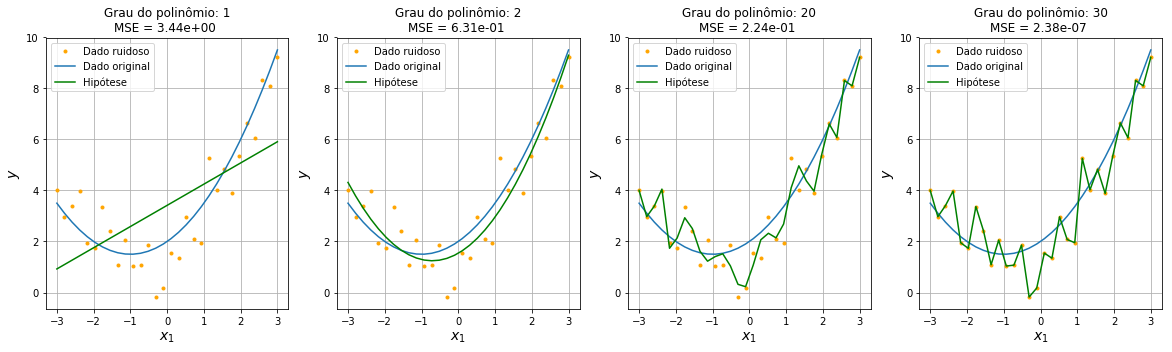

In [13]:
# Polinomial degrees to be tested.
degrees = [1, 2, 20, 30]

# Include column of ones once the target function has a bias.
include_bias = True

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1) 

    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    polynomial_regression.fit(x1, y_noisy)
    
    # Use the trained model for prediction.
    yp1 = polynomial_regression.predict(x1)
    
    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse = mean_squared_error(y_noisy, yp1)
    
    plt.plot(x1, y_noisy, '.', color='orange', label='Dado ruidoso')
    plt.plot(x1, y, label='Dado original')
    plt.plot(x1, yp1, 'g', label='Hipótese')
    plt.legend(loc='best')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid()
    plt.title("Grau do polinômio: {}\nMSE = {:.2e} ".format(degrees[i], mse))

# Show the plot.
plt.show()

+ As we can see, the polynomial of order 1 **is not flexible enough** to "squirm" and approximate the true function.
    + **very low** generalizability and flexibility.
    + Phenomenon known as **underfitting**.

+ The lowest mean squared error (MSE) is obtained with the polynomial of order 30, because due to its high "complexity/flexibility" it "adjusts" almost perfectly to the training data, "learning" even the present noise.

+ It's like the model **memorizes** the training data.
    + This effect occurs with models of order close to the number of examples.
    + However, the approximation is quite far from the generator model.
    + **very low** generalizability and **very high** flexibility.
    + Phenomenon known as **overfitting**.

+ The second-order polynomial is the one that best fits the true function.
    + **Commitment** between generalizability and flexibility.
    + This approximation will be better the larger the set and/or the smaller the amount of noise.
    
+ The **flexibility** can be measured with the samples used for model training. This error is called a **training error**.

+ The **generalization ability** can be measured with unpublished samples, that is, not seen during training. This error is called a **validation error**.

+ Therefore, it is very common to divide the **total sample set** into two sets, **training** and **validation**.

+ Which of the four models would be the best at predicting output values ​​for inputs not seen during training?
    + This ability to predict values ​​for previously unseen inputs is called **generalization ability**.

### Small data set but no noise

In [8]:
# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

In [9]:
# Sets the number of examples.
N = 30

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

# Create target function
y = 2 + x1 + 0.5*x1**2

# Observable function.
y_noisy = y

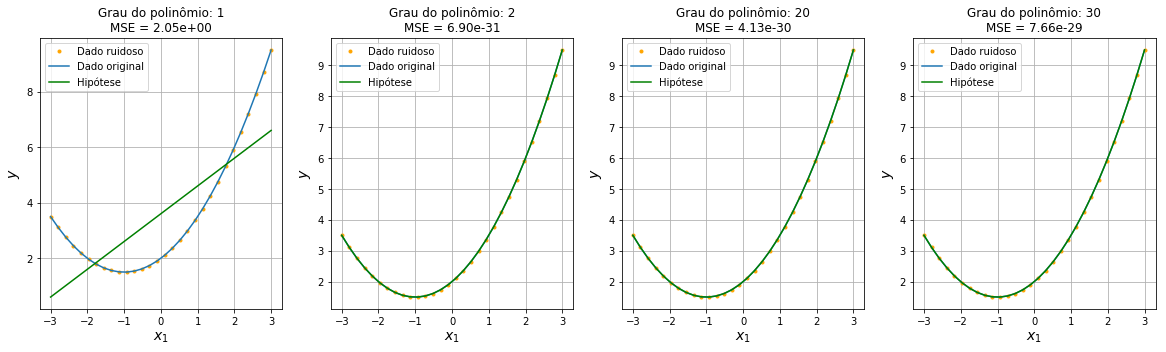

In [10]:
# Polinomial degrees to be tested.
degrees = [1, 2, 20, 30]

# Include column of ones once the target function has a bias.
include_bias = True

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)  

    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    polynomial_regression.fit(x1, y_noisy)
    
    # Use the trained model for prediction.
    yp1 = polynomial_regression.predict(x1)    
    
    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse = mean_squared_error(y_noisy, yp1)
    
    plt.plot(x1, y_noisy, '.', color='orange', label='Dado ruidoso')
    plt.plot(x1, y, label='Dado original')
    plt.plot(x1, yp1, 'g', label='Hipótese')
    plt.legend(loc='best')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid()
    plt.title("Grau do polinômio: {}\nMSE = {:.2e}".format(degrees[i], mse))

#Show the plot.
plt.show()

+ As there is no noise being added to the examples of the generator polynomial, any polynomial with order greater than or equal to the order of the polynomial (in this case, two) can already perfectly approximate the training data.

+ Any polynomial order greater than or equal to two already has enough flexibility to fit the original function.

+ Therefore, **the less noise** the samples have, even with a very flexible polynomial, **the better the approximations will be**.

### Larger and noisy training set

In [14]:
# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

In [19]:
# Sets the number of examples.
N = 1000

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

# Create target function.
y = 2 + x1 + 0.5*x1**2

# Noise.
w = np.random.randn(N, 1)

# Observable function.
y_noisy = y + w

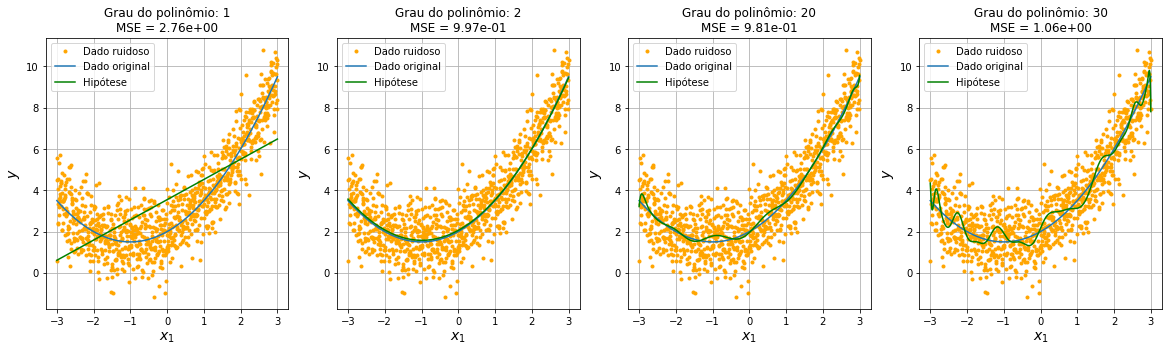

In [20]:
# Polinomial degrees to be tested.
degrees = [1, 2, 20, 30]

# Include column of ones once the target function has a bias.
include_bias = True

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)  

    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    polynomial_regression.fit(x1, y_noisy)
    
    # Use the trained model for prediction.
    yp1 = polynomial_regression.predict(x1)    
    
    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse = mean_squared_error(y_noisy, yp1)
    
    plt.plot(x1, y_noisy, '.', color='orange', label='Dado ruidoso')
    plt.plot(x1, y, label='Dado original')
    plt.plot(x1, yp1, 'g', label='Hipótese')
    plt.legend(loc='best')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid()
    plt.title("Grau do polinômio: {}\nMSE = {:.2e}".format(degrees[i], mse))

#Show the plot.
plt.show()

+ The approximation will be better the larger the training set.

+ For order equal to 2, we see that increasing the training set resulted in a better model.

+ Even with a larger base, the polynomial of order 1 (i.e., straight line) does not have enough flexibility to approximate the true function.

+ Polynomials of order twenty and thirty come closest to the true function.
    + As we have a much larger number of samples than the degree of the polynomial, it doesn't have enough flexibility/complexity to **memorize** the samples.

### Even bigger training set with noise

In [12]:
# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

In [13]:
# Sets the number of examples.
N = 100000

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

# Create target function.
y = 2 + x1 + 0.5*x1**2

# Noise.
w = np.random.randn(N, 1)

# Observable function.
y_noisy = y + w

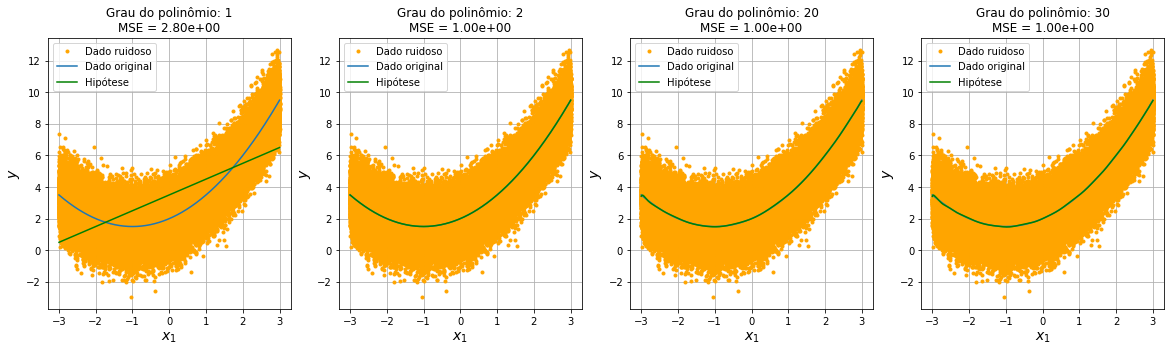

In [14]:
# Polinomial degrees to be tested.
degrees = [1, 2, 20, 30]

# Include column of ones once the target function has a bias.
include_bias = True

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)  

    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    polynomial_regression.fit(x1, y_noisy)
    
    # Use the trained model for prediction.
    yp1 = polynomial_regression.predict(x1)    
    
    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse = mean_squared_error(y_noisy, yp1)

    plt.plot(x1, y_noisy, '.', color='orange', label='Dado ruidoso')
    plt.plot(x1, y, label='Dado original')
    plt.plot(x1, yp1, 'g', label='Hipótese')
    plt.legend(loc='best')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid()
    plt.title("Grau do polinômio: {}\nMSE = {:.2e}".format(degrees[i], mse))

#Show the plot.
plt.show()

+ The linearregressor finds the **weights** that make the chosen polynomial **assumption function** **minimize** the **error** for all values ​​of $x_1$.

+ Looking at the large amount of orange dots, we realize that the **only way to minimize the error** for every value of $x_1$, is to have the **hypothesis function passing exactly through the average of the values ​​of $y$**, which results in a very good approximation of the generating function.


+ See that as the order of the last two polynomials is much smaller than the number of samples, the chosen polynomial hypothesis function does not adjust to the noisy points, as before, but to the average of the values ​​of $y$ along the values ​​of $x_1$.


+ As we use many training examples, the capacity (or flexibility) of the model is not enough to go through all the points (i.e., **memorize**), so it stops learning the noise to focus on learning the function by behind the data generation process, that is, it finds a function that minimizes the mean squared error.


+ The figure below makes this clearer.

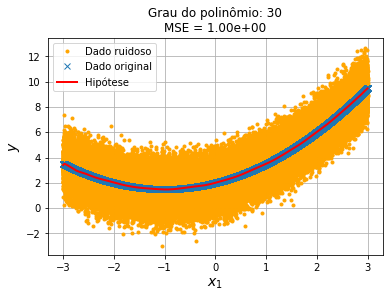

In [15]:
plt.plot(x1, y_noisy, '.', color='orange', label='Dado ruidoso')
plt.plot(x1, y, 'x', label='Dado original')
plt.plot(x1, yp1, 'r', linewidth=2, label='Hipótese')
plt.legend(loc='best')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid()
plt.title("Grau do polinômio: {}\nMSE = {:.2e}".format(degrees[i], mse))
plt.show()